In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
from sklearn.decomposition import PCA

In [18]:
df=np.genfromtxt('PCA_practice_dataset.csv',delimiter=',')

In [19]:
df

array([[-0.03125   ,  0.236364  ,  0.238095  , ..., -0.1875    ,
         0.495146  ,  0.515789  ],
       [-0.03125   ,  0.309091  ,  0.380952  , ...,  0.125     ,
         0.533981  ,  0.368421  ],
       [-0.03125   ,  0.381818  ,  0.261905  , ..., -0.03125   ,
         0.650485  ,  0.452632  ],
       ...,
       [-0.13697517, -0.06848028, -0.46606699, ..., -0.18151242,
        -0.05307943, -0.41632828],
       [-0.16307672, -0.0909091 , -0.47619   , ..., -0.03125   ,
         0.0873786 , -0.263158  ],
       [-0.16611772, -0.16459449, -0.55639249, ..., -0.12664685,
        -0.07000765, -0.326316  ]])

In [20]:
mean_vec = np.mean(df, axis = 0)
cov_mat = (df - mean_vec).T.dot((df - mean_vec))

In [21]:
# Do the eigen decomposiion
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Covariance matrix \n%s' % cov_mat) 
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Covariance matrix 
[[1589.25787593 1423.34815078  101.09686414 ... 1337.86647195
  1301.07319948   35.26051072]
 [1423.34815078 1717.70438849  237.43349453 ... 1212.29875215
  1585.86330953  158.40070013]
 [ 101.09686414  237.43349453 1367.87766683 ...   57.3780872
   200.21715172  953.42299073]
 ...
 [1337.86647195 1212.29875215   57.3780872  ... 1553.86904176
  1497.39034442   72.60644234]
 [1301.07319948 1585.86330953  200.21715172 ... 1497.39034442
  1951.16579856  201.66494912]
 [  35.26051072  158.40070013  953.42299073 ...   72.60644234
   201.66494912 1059.67740549]]
Eigenvectors 
[[ 0.21572801  0.01745274  0.2504586  ...  0.0616448   0.0158307
   0.01692287]
 [ 0.22815205  0.04361004 -0.1948597  ... -0.22198511 -0.11280674
   0.07723277]
 [ 0.00163355  0.27521676 -0.02058596 ...  0.25928418 -0.09639756
  -0.07186911]
 ...
 [ 0.21294355  0.01930754  0.24360533 ... -0.06338388 -0.17800387
   0.06444792]
 [ 0.2425649   0.04718476 -0.21514605 ...  0.11054212  0.11256598
  -0.05384

This is basically done not by just eye-balling, but by stats. After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components. 

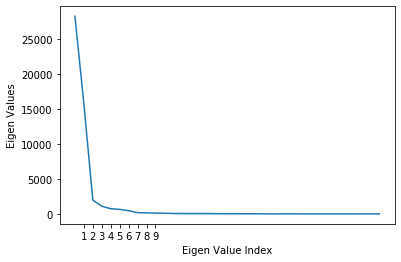

In [24]:
plt.ylabel('Eigen Values')
plt.xlabel('Eigen Value Index')
ndim=np.arange(1,10,1)
plt.plot(eig_vals)
plt.xticks (ndim)
plt.show()

In [52]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print(var_exp)

[56.21164703436947, 31.364541738490487, 3.941149153256797, 2.202139918303262, 1.5054482494104506, 1.3056506238401848, 0.9231233986052318, 0.38656399558060023, 0.31320260457826576, 0.24572344639402374, 0.21344786891781906, 0.13464311526765121, 0.12018591605827011, 0.11487789999028261, 0.11225053279256454, 0.10999126035151181, 0.08129739501309766, 0.07273628453575388, 0.06724237568009972, 0.05817435137332518, 0.05606672070959521, 0.051931739414358996, 0.04743006775576106, 0.04539073864827286, 0.04307940141887684, 0.03609990959469093, 0.03443650646508919, 0.03159556375725883, 0.029868624490987917, 0.028111149689833862, 0.026567717560416745, 0.024110333666094542, 0.023063367949038148, 0.020825160971372526, 0.01738583509924368]


### Dimensionality Reduction Using PCA

In [26]:
pca = PCA(random_state=42)
pca.fit(df)
pca.components_

array([[-0.21572801, -0.22815205, -0.00163355, ..., -0.21294355,
        -0.2425649 ,  0.001082  ],
       [-0.01745274, -0.04361004, -0.27521676, ..., -0.01930754,
        -0.04718476, -0.23938544],
       [-0.2504586 ,  0.1948597 ,  0.02058596, ..., -0.24360533,
         0.21514605,  0.03220362],
       ...,
       [-0.0838448 ,  0.2215772 ,  0.01979956, ..., -0.05195415,
         0.18100893, -0.03967948],
       [ 0.07398352, -0.21849896,  0.17446027, ..., -0.02238621,
         0.06282336,  0.05790541],
       [-0.03197428,  0.10138936, -0.04617926, ..., -0.00223621,
         0.03932675,  0.03113559]])

In [27]:
pca.explained_variance_ratio_

array([5.62116470e-01, 3.13645417e-01, 3.94114915e-02, 2.20213992e-02,
       1.50544825e-02, 1.30565062e-02, 9.23123399e-03, 3.86563996e-03,
       3.13202605e-03, 2.45723446e-03, 2.13447869e-03, 1.34643115e-03,
       1.20185916e-03, 1.14877900e-03, 1.12250533e-03, 1.09991260e-03,
       8.12973950e-04, 7.27362845e-04, 6.72423757e-04, 5.81743514e-04,
       5.60667207e-04, 5.19317394e-04, 4.74300678e-04, 4.53907386e-04,
       4.30794014e-04, 3.60999096e-04, 3.44365065e-04, 3.15955638e-04,
       2.98686245e-04, 2.81111497e-04, 2.65677176e-04, 2.41103337e-04,
       2.30633679e-04, 2.08251610e-04, 1.73858351e-04])

Text(0, 0.5, 'Variance Ratio')

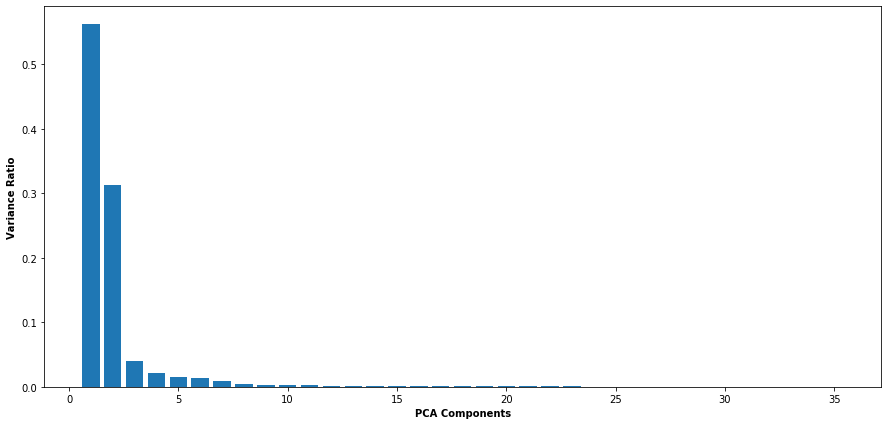

In [29]:
# Variance Ratio bar plot for each PCA components.
plt.figure(figsize=(15,7))
ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

In [31]:
pca = PCA(n_components=10)

In [33]:
principal_components = pca.fit_transform(df)
print(df.shape)
print(principal_components.shape)

(8042, 35)
(8042, 10)


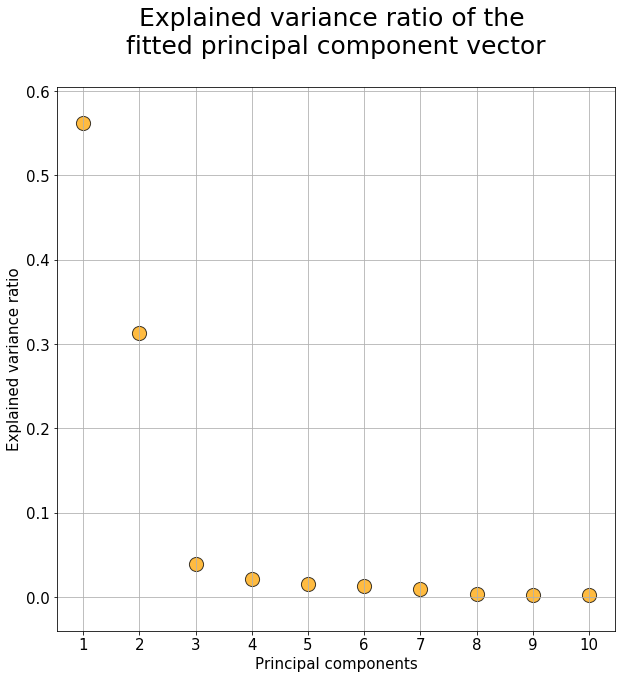

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(x=[i+1 for i in range(len(pca.explained_variance_ratio_))],
            y=pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

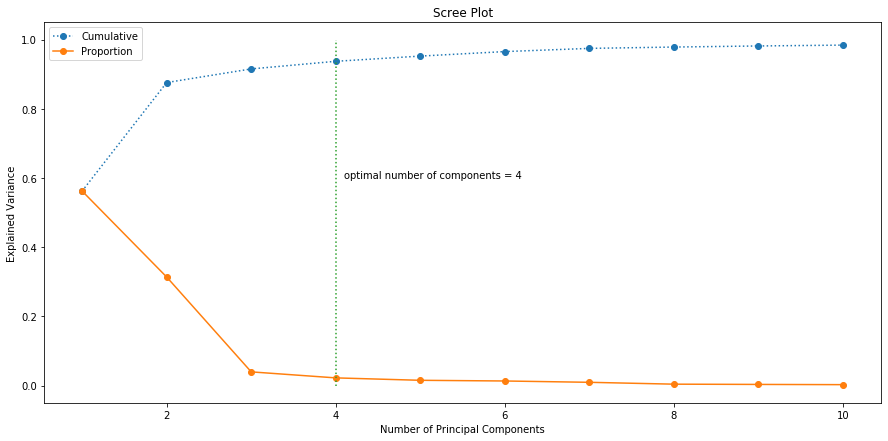

In [46]:
plt.figure(figsize=(15,7))
plt.plot(range(1,11), np.cumsum(pca.explained_variance_ratio_), linestyle=":", marker='o', label='Cumulative')
plt.plot(range(1,11), pca.explained_variance_ratio_, marker='o', label='Proportion')
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")
plt.title("Scree Plot")
plt.plot([4]*10, np.linspace(0,1,10), ":")
plt.text(4.1, 0.6, "optimal number of components = 4")
plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'Cumulative Explained Variance')

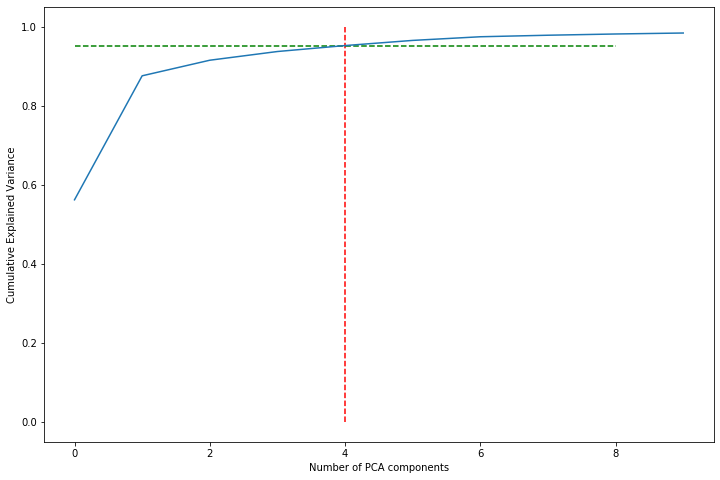

In [49]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=8, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')

### It is evident from the above Scree plot that more than 90% variance is explained by the first 4 principal components.